# TUBES AI

Mencari rute terbaik menuju suatu <i>key loaction</i> dengan menggunakan representasi data graph dan metode pencarian A*

Aturan Graph:
 1. Setiap node adalah lokasi unik / key location
 2. Setiap edge antar node adalah jalan menuju dari suatu node ke node lain
 3. Setiap weight adalah waktu tempuh kendaraan bermotor antar node (pakai Google map)
 4. Adjent node merupakan key location sekitarnya

Output A* berupa rekomendasi jalur menuju target beserta prediksi total waktu
Output terakhir berupa jalur yang telah diambil dan total waktu yang dihabiskan

Menggunakan struktur data dan algoritma Graph networkx
https://networkx.org/documentation/stable/index.html

In [ ]:
import networkx as nx
from networkx.algorithms.shortest_paths.astar import astar_path, astar_path_length
import matplotlib.pyplot as plt
import random
from math import sqrt

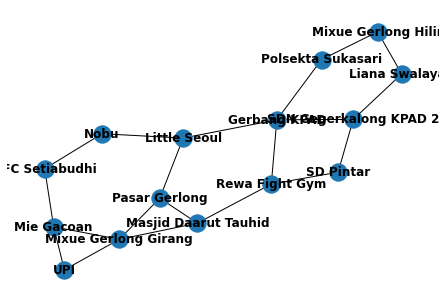

In [ ]:
'''
Ketentuan Graph:
 > Setiap node adalah lokasi unik / key location
 > Setiap edge antar node adalah jalan menuju dari suatu node ke node lain
 > Setiap weight adalah waktu tempuh kendaraan bermotor antar node (pakai Google map)
 > Adjent node merupakan key location sekitarnya

Algoritma A* harus dapat:
  > Menggunakan graph networkx sebagai input
  > Mengembalikan urutan jalur menuju target
  > Mengembalikan total path cost yang diprediksi

Algoritma pelengkapnya:
  > Mengubah weight yg berdasarkan jarak menjadi waktu perjalanan
  > Buat algoritma untuk "jalan" di dalam graph berdasarkan output A*
  > Tambahkan faktor kemacetan yang mempengaruhi weight setiap edge
  > Kemacetan berubah setiap pindah node
  > Oleh karena itu, setiap kali pindah node, lakukan pencarian A*
'''

G = nx.Graph()
nodes = ([
    ('Mixue Gerlong Hilir', {"y": -6.867957829028784, "x": 107.58086639877392}),  # x dan y merupakan koordinat astronomis
    ('UPI', {"y": -6.863472279233892, "x": 107.59460338737775}),                  # y adalah garis lintang dan x adalah garis bujur
    ('Mixue Gerlong Girang', {"y": -6.864452165312002, "x": 107.59242890695806}),
    ('Polsekta Sukasari', {"y": -6.868595605705262, "x": 107.5827207885288}),
    ('Mie Gacoan', {"y": -6.86625594701538, "x": 107.59390824351746}),
    ('Liana Swalayan', {"y": -6.867878336159273, "x": 107.58062047813657}),
    ('Gerbang KPAD', {"y": -6.867992814227079, "x": 107.5862030061026}),
    ('Rewa Fight Gym', {"y": -6.8639841214676816, "x": 107.5877457773783}),
    ('Masjid Daarut Tauhid', {"y": -6.863646878484427, "x": 107.5898467287539}),
    ('KFC Setiabudhi', {"y": -6.868328788967844, "x": 107.59363057911263}),
    ('Nobu', {"y": -6.870410937195357, "x": 107.5930582409248}),
    ('Pasar Gerlong', {"y": -6.867523428035698, "x": 107.59148198804144}),
    ('Little Seoul', {"y": -6.869901788846727, "x": 107.5909079643836}),
    ('SDN Gegerkalong KPAD 2', {"y": -6.866574110862758, "x": 107.58169346169299}),
    ('SD Pintar', {"y": -6.862111529292752, "x": 107.58308951030233}),
])
G.add_nodes_from(nodes)

edges = ([
    ('Mixue Gerlong Hilir', 'Polsekta Sukasari', {"jarak": 130.0}),  #jarak dalam satuan meter
    ('Mixue Gerlong Hilir', 'Liana Swalayan', {"jarak": 100.0}),     # weight berupa prediksi waktu tempuh
    ('UPI', 'Mie Gacoan', {"jarak": 300.0}),
    ('UPI', 'Mixue Gerlong Girang', {"jarak": 355.0}),
    ('Mixue Gerlong Girang', 'Mie Gacoan', {"jarak": 330.0}),
    ('Mixue Gerlong Girang', 'Masjid Daarut Tauhid', {"jarak": 300.0}),
    ('Polsekta Sukasari', 'Gerbang KPAD', {"jarak": 460.0}),
    ('Mie Gacoan', 'KFC Setiabudhi', {"jarak": 230.0}),
    ('KFC Setiabudhi', 'Nobu', {"jarak": 280.0}),
    ('Gerbang KPAD', 'Rewa Fight Gym', {"jarak": 410.0}),
    ('Rewa Fight Gym', 'Masjid Daarut Tauhid', {"jarak": 325.0}),
    ('Pasar Gerlong', 'Mixue Gerlong Girang', {"jarak": 465.0}),
    ('Pasar Gerlong', 'Masjid Daarut Tauhid', {"jarak": 561.0}),
    ('Pasar Gerlong', 'Little Seoul', {"jarak": 308.0}),
    ('Nobu', 'Little Seoul', {"jarak": 238.0}),
    ('Little Seoul', 'Gerbang KPAD', {"jarak": 610.0}),
    ('SDN Gegerkalong KPAD 2', 'Gerbang KPAD', {"jarak": 580.0}),
    ('SDN Gegerkalong KPAD 2', 'Liana Swalayan', {"jarak": 405.0}),
    ('SDN Gegerkalong KPAD 2', 'SD Pintar', {"jarak": 533.0}),
    ('SD Pintar', 'Rewa Fight Gym', {"jarak": 781.0}),
])

G.add_edges_from(edges)

nx.draw(G, with_labels=True, font_weight='bold',)


In [ ]:

'''
Fungsi bagian ini digunakan untuk mendapatkan kemacetan setiap edge yang akan mempengaruhi perihitungan weight
Untuk simulasi, kami memasukkan nilai random untuk kemacetannya.
Tingkat kemacetan dilihat dari kecepatan rata-ratanya dalam hitungan meter / sekon
Wight merupakan prediksi waktu yang diperlukan melalui suatu edge antara node A ke node B
'''
def getTraffic(Graph):
  avrgSpeed = [5.6 , 4.2, 2.8, 1.4]
  edges = Graph.edges
  for edgesVal in list(edges):
    Graph.edges[edgesVal]['weight'] =  Graph.edges[edgesVal]['jarak'] / random.choice(avrgSpeed)

#uji coba fungsi getTraffic
edgy = G
getTraffic(edgy)
print(edgy.edges.data())

'''
Fungsi heuristic custom menggunakan letak astronomis setiap lokasi
y mewakilkan lintang (selatan dan utara)
x mewakilkan bujur (timur dan barat)
Heuristic merupakan straight line distance, menghitung panjang garis lurus antara dua lokasi
'''
def madeUpHeuristic(Graph, curNode, TargetNode):
  A = Graph.nodes.get(curNode)
  B = Graph.nodes.get(TargetNode)
  heuristic = sqrt(pow(A['y'] - B['y'], 2) + pow(A['x'] - B['x'],2))
  return heuristic

#uji coba fungsi madeUpHeuristic
number = madeUpHeuristic(G, 'Mixue Gerlong Hilir', 'Mixue Gerlong Girang')
print(number)


[('Mixue Gerlong Hilir', 'Polsekta Sukasari', {'jarak': 130.0, 'weight': 30.952380952380953}), ('Mixue Gerlong Hilir', 'Liana Swalayan', {'jarak': 100.0, 'weight': 35.714285714285715}), ('UPI', 'Mie Gacoan', {'jarak': 300.0, 'weight': 53.57142857142858}), ('UPI', 'Mixue Gerlong Girang', {'jarak': 355.0, 'weight': 253.57142857142858}), ('Mixue Gerlong Girang', 'Mie Gacoan', {'jarak': 330.0, 'weight': 78.57142857142857}), ('Mixue Gerlong Girang', 'Masjid Daarut Tauhid', {'jarak': 300.0, 'weight': 107.14285714285715}), ('Mixue Gerlong Girang', 'Pasar Gerlong', {'jarak': 465.0, 'weight': 332.14285714285717}), ('Polsekta Sukasari', 'Gerbang KPAD', {'jarak': 460.0, 'weight': 82.14285714285715}), ('Mie Gacoan', 'KFC Setiabudhi', {'jarak': 230.0, 'weight': 164.2857142857143}), ('Liana Swalayan', 'SDN Gegerkalong KPAD 2', {'jarak': 405.0, 'weight': 289.2857142857143}), ('Gerbang KPAD', 'Rewa Fight Gym', {'jarak': 410.0, 'weight': 97.61904761904762}), ('Gerbang KPAD', 'Little Seoul', {'jarak': 6

In [ ]:
"""Shortest paths and path lengths using the A* ("A star") algorithm (modified).
"""
from heapq import heappop, heappush
from itertools import count

import networkx as nx
from networkx.algorithms.shortest_paths.weighted import _weight_function


def custom_astar_path(G, source, target, heuristic=None, weight="weight"):
    """Returns a list of nodes in a shortest path between source and target
    using the A* ("A-star") algorithm.

    There may be more than one shortest path.  This returns only one.

    Parameters
    ----------
    G : NetworkX graph

    source : node
       Starting node for path

    target : node
       Ending node for path

    heuristic : function
       A function to evaluate the estimate of the distance
       from the a node to the target.  The function takes
       two nodes arguments and must return a number.
       If the heuristic is inadmissible (if it might
       overestimate the cost of reaching the goal from a node),
       the result may not be a shortest path.
       The algorithm does not support updating heuristic
       values for the same node due to caching the first
       heuristic calculation per node.

    weight : string or function
       If this is a string, then edge weights will be accessed via the
       edge attribute with this key (that is, the weight of the edge
       joining `u` to `v` will be ``G.edges[u, v][weight]``). If no
       such edge attribute exists, the weight of the edge is assumed to
       be one.
       If this is a function, the weight of an edge is the value
       returned by the function. The function must accept exactly three
       positional arguments: the two endpoints of an edge and the
       dictionary of edge attributes for that edge. The function must
       return a number.

    Raises
    ------
    NetworkXNoPath
        If no path exists between source and target.

    Examples
    --------
    >>> G = nx.path_graph(5)
    >>> print(nx.astar_path(G, 0, 4))
    [0, 1, 2, 3, 4]
    >>> G = nx.grid_graph(dim=[3, 3])  # nodes are two-tuples (x,y)
    >>> nx.set_edge_attributes(G, {e: e[1][0] * 2 for e in G.edges()}, "cost")
    >>> def dist(a, b):
    ...     (x1, y1) = a
    ...     (x2, y2) = b
    ...     return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    >>> print(nx.astar_path(G, (0, 0), (2, 2), heuristic=dist, weight="cost"))
    [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]


    See Also
    --------
    shortest_path, dijkstra_path

    """
    if source not in G or target not in G:
        msg = f"Either source {source} or target {target} is not in G"
        raise nx.NodeNotFound(msg)

    if heuristic is None:
        # The default heuristic jadi heuristic custom yang menerima input
        # nx.Graph, key value node A, key value node B
        def madeUpHeuristic(Graph, curNode, TargetNode):
          A = Graph.nodes.get(curNode)
          B = Graph.nodes.get(TargetNode)
          heuristic = sqrt(pow(A['y'] - B['y'], 2) + pow(A['x'] - B['y'],2))
          return heuristic

    push = heappush
    pop = heappop
    weight = _weight_function(G, weight)

    # The queue stores priority, node, cost to reach, and parent.
    # Uses Python heapq to keep in priority order.
    # Add a counter to the queue to prevent the underlying heap from
    # attempting to compare the nodes themselves. The hash breaks ties in the
    # priority and is guaranteed unique for all nodes in the graph.
    c = count()
    queue = [(0, next(c), source, 0, None)]

    # Maps enqueued nodes to distance of discovered paths and the
    # computed heuristics to target. We avoid computing the heuristics
    # more than once and inserting the node into the queue too many times.
    enqueued = {}
    # Maps explored nodes to parent closest to the source.
    explored = {}

    while queue:
        # Pop the smallest item from queue.
        _, __, curnode, dist, parent = pop(queue)

        if curnode == target:
            path = [curnode]
            node = parent
            while node is not None:
                path.append(node)
                node = explored[node]
            path.reverse()
            return path

        if curnode in explored:
            # Do not override the parent of starting node
            if explored[curnode] is None:
                continue

            # Skip bad paths that were enqueued before finding a better one
            qcost, h = enqueued[curnode]
            if qcost < dist:
                continue

        explored[curnode] = parent

        for neighbor, w in G[curnode].items():
            ncost = dist + weight(curnode, neighbor, w)
            if neighbor in enqueued:
                qcost, h = enqueued[neighbor]
                # if qcost <= ncost, a less costly path from the
                # neighbor to the source was already determined.
                # Therefore, we won't attempt to push this neighbor
                # to the queue
                if qcost <= ncost:
                    continue
            else:
                h = madeUpHeuristic(G, neighbor, target)
            enqueued[neighbor] = ncost, h
            push(queue, (ncost + h, next(c), neighbor, ncost, curnode))

    raise nx.NetworkXNoPath(f"Node {target} not reachable from {source}")


# Fungsi ini menugubah kumpulan detik menjadi
# jam, menit, dan detik
def convertSeconds(seconds):
  seconds %= (24 * 3600)
  hour = seconds // 3600
  seconds %= 3600
  minutes = seconds // 60
  seconds %= 60

  return "%d Hours %02d Minutes %02d Seconds" % (hour, minutes, seconds)

# fungsi utama untuk mencari jalan terbaik
# yang memperhitungkan tingkat kemacetan
# Pengecekkan path terbaik dilakukan setiap berpindah node
# sebab kemacetan selalu berubah
# ada kemungkinan rekomendasi path menunjukkan bahwa kita sebaiknya
# berputar balik (langka)
def myFunction(Graph, Startnode, Endnode, total_cost=0, actual_path = []):

  #mengecek apakah Startnode dan Endnode ada di Graph
  if Startnode not in Graph or Endnode not in Graph:
      msg = f"Either source {Startnode} or target {Endnode} is not in G"
      raise nx.NodeNotFound(msg)

  # memasukkan path yang telah diambil
  # ke list path2 yang telah diambil
  actual_path.append(Startnode)

  '''
  Selagi belum berada  di node target,
  lakukan pencarian path dan masuk ke node yang
  disarankan oleh algoritma Astar
  Setiap pencarian akan melaporkan jalur yang sedang diambil,
  prediksi waktu total yang akan diperlukan,
  dan total waktu yang sudah ditempuh
  Bila sudah berada di node target,
  laporkan path yang dilalui dan juga
  total waktu yang dibbutuhkan
  '''
  if (Startnode != Endnode):
    # setiap pindah node, kemacetan berubah
    getTraffic(Graph)
    path = custom_astar_path(Graph, Startnode, Endnode)

    # mendapatkan weight dari edges
    weight = _weight_function(G, 'weight')
    predicted_cost = sum(weight(u, v, G[u][v]) for u,v in zip(path[:-1], path[1:]))
    print(f"Current path:\n{path}\npredicted cost : {convertSeconds(predicted_cost)}")
    print(f"Current total cost : {convertSeconds(total_cost)}")
    total_cost += Graph.edges[path[0], path[1]]['weight']
    print("\n")

    # rekursif hingga ketemu node target
    path = myFunction(Graph, path[1], Endnode, total_cost)
  else:
    print(f"arrived at {Endnode} with total cost {convertSeconds(total_cost)}")
    print(f"Path taken:\n{actual_path}")

In [ ]:
myFunction(G, 'Mixue Gerlong Hilir', 'UPI')

Current path:
['Mixue Gerlong Hilir', 'Polsekta Sukasari', 'Gerbang KPAD', 'Rewa Fight Gym', 'Masjid Daarut Tauhid', 'Mixue Gerlong Girang', 'UPI']
predicted cost : 0 Hours 13 Minutes 28 Seconds
Current total cost : 0 Hours 00 Minutes 00 Seconds


Current path:
['Polsekta Sukasari', 'Gerbang KPAD', 'Rewa Fight Gym', 'Masjid Daarut Tauhid', 'Mixue Gerlong Girang', 'UPI']
predicted cost : 0 Hours 10 Minutes 13 Seconds
Current total cost : 0 Hours 00 Minutes 23 Seconds


Current path:
['Gerbang KPAD', 'Rewa Fight Gym', 'Masjid Daarut Tauhid', 'Mixue Gerlong Girang', 'UPI']
predicted cost : 0 Hours 06 Minutes 58 Seconds
Current total cost : 0 Hours 05 Minutes 51 Seconds


Current path:
['Rewa Fight Gym', 'Masjid Daarut Tauhid', 'Mixue Gerlong Girang', 'UPI']
predicted cost : 0 Hours 03 Minutes 53 Seconds
Current total cost : 0 Hours 08 Minutes 18 Seconds


Current path:
['Masjid Daarut Tauhid', 'Mixue Gerlong Girang', 'Mie Gacoan', 'UPI']
predicted cost : 0 Hours 03 Minutes 59 Seconds
Curr